In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df_train = pd.read_csv("C:/Users/Роман/Chepenkov_dz2/application_train.csv")
df_test = pd.read_csv("C:/Users/Роман/Chepenkov_dz2/application_test.csv")

## Learning data

In [16]:
df_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
print('Доля дефолтов в трейне:', sum(df_train['TARGET']) / len(df_train))

Доля дефолтов в трейне: 0.08072881945686496


## Education

In [5]:
df_train["NAME_EDUCATION_TYPE"].unique()

array(['Secondary / secondary special', 'Higher education',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

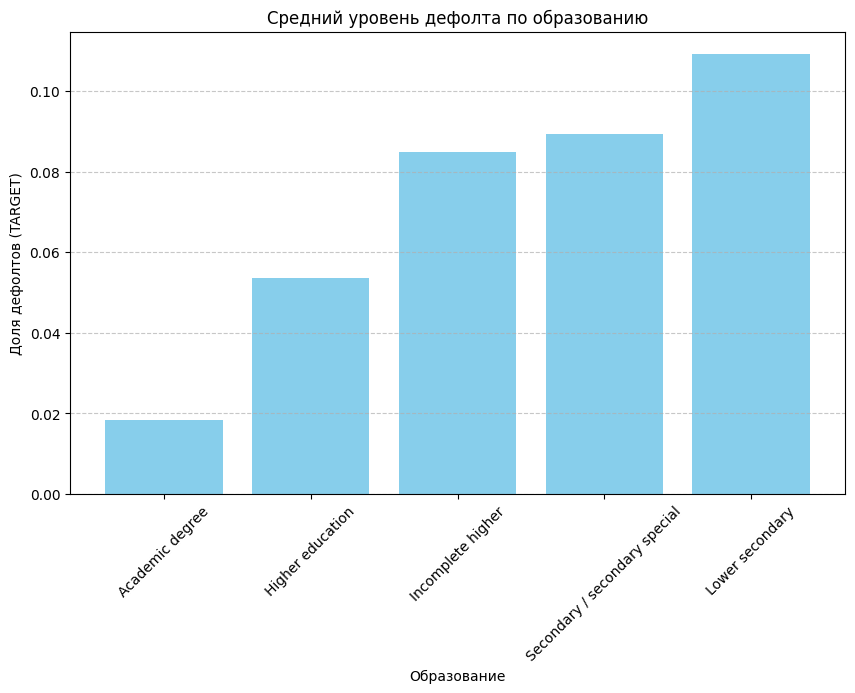

In [6]:
education_target = (
    df_train['TARGET']
    .groupby(df_train["NAME_EDUCATION_TYPE"])
    .mean()
    .reset_index()
)
education_target.columns = ['Education', 'Default_Rate']

education_target_sorted = education_target.sort_values('Default_Rate', ascending=True)

plt.figure(figsize=(10, 6))
plt.bar(
    education_target_sorted['Education'], 
    education_target_sorted['Default_Rate'], 
    color='skyblue'
)
plt.title('Средний уровень дефолта по образованию')
plt.xlabel('Образование')
plt.ylabel('Доля дефолтов (TARGET)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Family status

In [7]:
df_train["NAME_FAMILY_STATUS"].value_counts()

NAME_FAMILY_STATUS
Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: count, dtype: int64

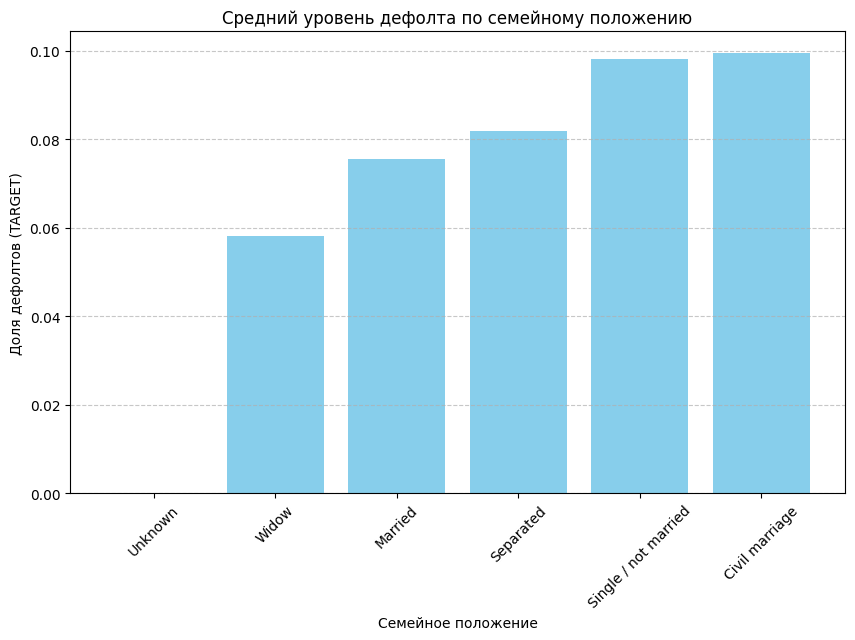

In [8]:
family_status_target = (
    df_train['TARGET']
    .groupby(df_train["NAME_FAMILY_STATUS"])
    .mean()
    .reset_index()
)
family_status_target.columns = ['Family status', 'Default_Rate']

family_status_target_sorted = family_status_target.sort_values('Default_Rate', ascending=True)

plt.figure(figsize=(10, 6))
plt.bar(
    family_status_target_sorted['Family status'], 
    family_status_target_sorted['Default_Rate'], 
    color='skyblue'
)
plt.title('Средний уровень дефолта по семейному положению')
plt.xlabel('Семейное положение')
plt.ylabel('Доля дефолтов (TARGET)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Days of week when credit is approved

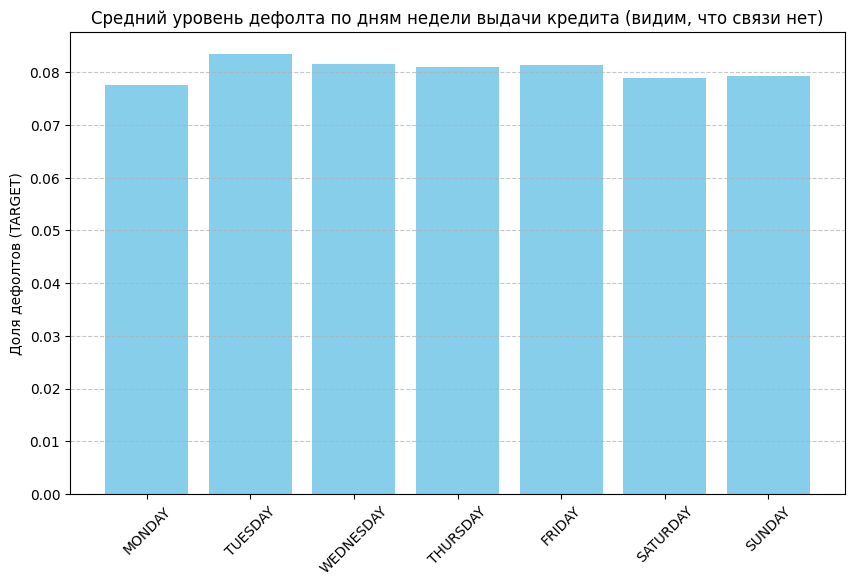

In [9]:
weekday_target = (
    df_train['TARGET']
    .groupby(df_train["WEEKDAY_APPR_PROCESS_START"])
    .mean()
    .reset_index()
)
weekday_target.columns = ['Weekday', 'Default_Rate']
weekday_target = weekday_target.iloc[[1,5,6,4,0,2,3]]

plt.figure(figsize=(10, 6))
plt.bar(
    weekday_target['Weekday'], 
    weekday_target['Default_Rate'], 
    color='skyblue'
)
plt.title('Средний уровень дефолта по дням недели выдачи кредита (видим, что связи нет)')
plt.ylabel('Доля дефолтов (TARGET)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Correlation heatmap

In [11]:
num_cols = df_train.select_dtypes(include=['float64', 'int64']).columns[2:]

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,-2120,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,-291,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,-2531,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,-2437,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,-3458,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,157500.0,254700.0,27558.0,225000.0,0.032561,-9327,-236,-8456.0,-1982,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,0,72000.0,269550.0,12001.5,225000.0,0.025164,-20775,365243,-4388.0,-4090,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,0,153000.0,677664.0,29979.0,585000.0,0.005002,-14966,-7921,-6737.0,-5150,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,0,171000.0,370107.0,20205.0,319500.0,0.005313,-11961,-4786,-2562.0,-931,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


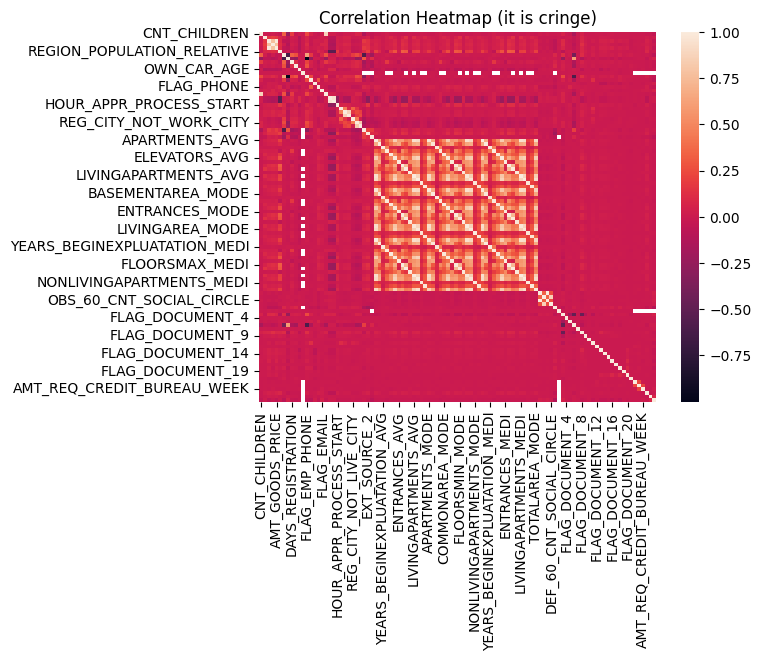

In [16]:
correlation_matrix = df_train[num_cols].corr()  
sns.heatmap(correlation_matrix)  
plt.title('Correlation Heatmap (it is cringe)')  
plt.show()

## How default and client's age are connected

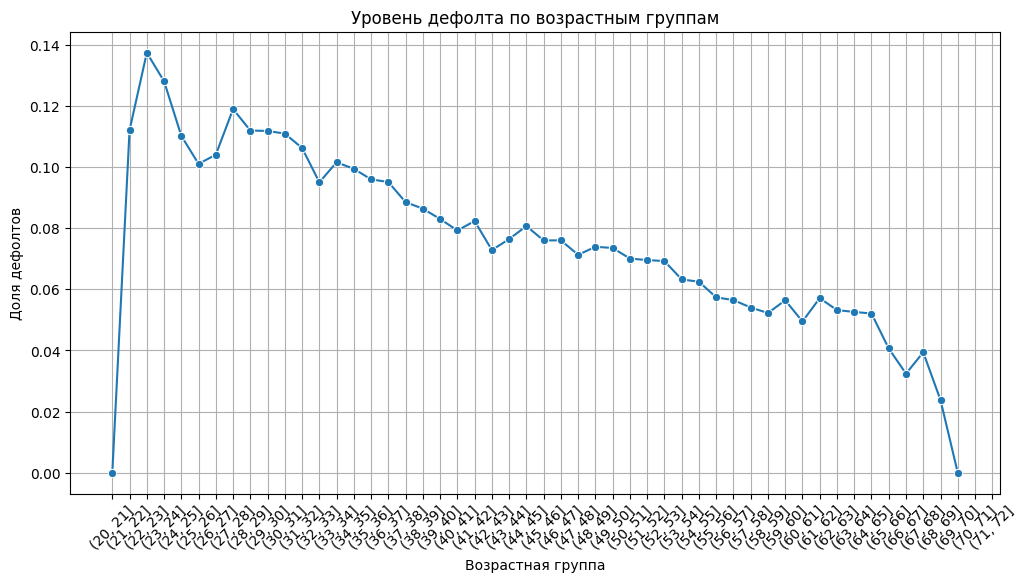

In [29]:
df_train['YEARS_BIRTH'] = -df_train['DAYS_BIRTH'] / 365.25
df_train['AGE_GROUP'] = pd.cut(df_train['YEARS_BIRTH'], bins=range(20, 80, 1))

age_target = df_train.groupby('AGE_GROUP', observed=False)['TARGET'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(
    x=age_target['AGE_GROUP'].astype(str), 
    y=age_target['TARGET'],
    marker='o'
)
plt.title('Уровень дефолта по возрастным группам')
plt.xlabel('Возрастная группа')
plt.ylabel('Доля дефолтов')
plt.xticks(rotation=45)
plt.grid()
plt.show()